<a href="https://colab.research.google.com/github/gaurav91022/Birds_in_Rage/blob/main/Copy_of_CNN_LSTM_stock_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
train_ratio=0.8
val_train=0.9

In [ ]:
#Reading Data
data = pd.read_csv('https://raw.githubusercontent.com/Agam9427/Finsearch/main/TTM.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-07-13,10.62,10.64,10.51,10.60,9.197446,136500
1,2005-07-14,10.50,10.50,10.33,10.39,9.015231,136000
2,2005-07-15,10.50,10.65,10.50,10.55,9.154059,158700
3,2005-07-18,10.72,10.74,10.66,10.72,9.301566,88000
4,2005-07-19,10.80,11.03,10.80,10.99,9.535840,128000


In [ ]:
#Data Preprocesing Using Z-score technique
mdata=data.drop('Date',axis=1)

from scipy.stats import zscore
mdata = mdata.apply(zscore)
mdata.head()



,Open,High,Low,Close,Adj Close,Volume
0,-1.141416,-1.154217,-1.134079,-1.143018,-1.198225,-1.426942
1,-1.153069,-1.167713,-1.151678,-1.163413,-1.215541,-1.427474
2,-1.153069,-1.153253,-1.135056,-1.147874,-1.202348,-1.403317
3,-1.131706,-1.144577,-1.119412,-1.131363,-1.188330,-1.478554
4,-1.123937,-1.116621,-1.105724,-1.105141,-1.166066,-1.435987


In [ ]:
#Making matrices of 10*6 shape
mdata=np.array(mdata)
dataset=[]
label=[]
for i in range(len(data.index) - 11):
  dataset.append(mdata[i:i+10])
  label.append(mdata[i+11][4])
label = np.array(label)
dataset = np.array(dataset)


In [ ]:
dataset[0]

array([[-1.14141601, -1.15421683, -1.13407868, -1.14301794, -1.19822472,
        -1.4269415 ],
       [-1.15306861, -1.16771288, -1.15167814, -1.16341347, -1.21554112,
        -1.42747359],
       [-1.15306861, -1.15325283, -1.13505642, -1.14787402, -1.20234791,
        -1.40331687],
       [-1.1317055 , -1.1445768 , -1.11941246, -1.13136335, -1.18832991,
        -1.47855388],
       [-1.1239371 , -1.11662069, -1.10572399, -1.10514052, -1.16606621,
        -1.43598697],
       [-1.11519765, -1.13011674, -1.11061273, -1.11970876, -1.17843501,
        -1.21836366],
       [-1.12879235, -1.14361279, -1.12527895, -1.13816186, -1.19410192,
        -1.4614207 ],
       [-1.12879235, -1.13397276, -1.11159048, -1.12359362, -1.18173312,
        -1.43694473],
       [-1.11713975, -1.12722473, -1.10865723, -1.12650727, -1.18420682,
        -1.43332654],
       [-1.11519765, -1.12336872, -1.101813  , -1.11291025, -1.172663  ,
        -1.4324752 ]])

In [ ]:
#Splitting Data into test, validation, train
r=int(len(dataset)*train_ratio)
s=int(len(dataset)*val_train)
X_train=dataset[:r]
X_val=dataset[r:s]
X_test=dataset[s:]
y_train=label[:r]
y_val=label[r:s]
y_test=label[s:]

In [ ]:
#Model
model = keras.models.Sequential()
model.add(layers.Conv1D(32,1,padding='same',activation='tanh',input_shape=(10,6)))
model.add(layers.MaxPool1D(pool_size=1,padding='same'))
model.add(layers.LSTM(64,activation='tanh',))
model.add(layers.Dense(1))

In [ ]:
model.compile(loss='mean_absolute_error',optimizer=keras.optimizers.Adam(learning_rate=0.001))

In [ ]:
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 10, 32)            224       
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 10, 32)           0         
 1D)                                                             
                                                                 
 lstm_4 (LSTM)               (None, 64)                24832     
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 25,121
Trainable params: 25,121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print("Training data: " + str(len(y_train)))
print("Test data: " + str(len(y_test)))

Training data: 3414
Test data: 427


In [ ]:
#Training
model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=100,batch_size=64)

Epoch 1/100
54/54 [==============================] - 3s 21ms/step - loss: 0.1888 - val_loss: 0.1395
Epoch 2/100
54/54 [==============================] - 1s 12ms/step - loss: 0.0837 - val_loss: 0.1133
Epoch 3/100
54/54 [==============================] - 1s 12ms/step - loss: 0.0764 - val_loss: 0.1077
Epoch 4/100
54/54 [==============================] - 1s 12ms/step - loss: 0.0724 - val_loss: 0.0811
Epoch 5/100
54/54 [==============================] - 1s 12ms/step - loss: 0.0694 - val_loss: 0.0759
Epoch 6/100
54/54 [==============================] - 1s 12ms/step - loss: 0.0685 - val_loss: 0.1273
Epoch 7/100
54/54 [==============================] - 1s 12ms/step - loss: 0.0711 - val_loss: 0.0718
Epoch 8/100
54/54 [==============================] - 1s 12ms/step - loss: 0.0677 - val_loss: 0.0656
Epoch 9/100
54/54 [==============================] - 1s 12ms/step - loss: 0.0649 - val_loss: 0.0561
Epoch 10/100
54/54 [==============================] - 1s 12ms/step - loss: 0.0676 - val_loss: 0.0766

In [ ]:
#Converting data back to Stock Price
m=data['Open'].mean()
s=data['Open'].std()
y_pred = model.predict(X_test)
y_pred = (y_pred * s) + m
y_test = (y_test * s) + m


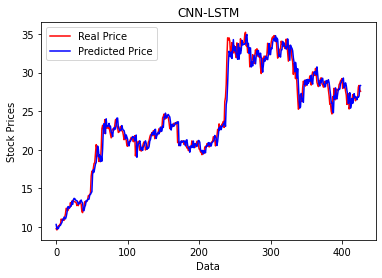

In [ ]:
#Plotting Result
plt.plot([x for x in range(len(y_test))],y_test,color='red')
plt.plot([x for x in range(len(y_test))],y_pred,color='blue')
plt.xlabel('Data')
plt.ylabel('Stock Prices')
plt.title("CNN-LSTM")
plt.legend(['Real Price','Predicted Price'])
plt.show()

In [ ]:
score = model.evaluate(X_test, y_test)
print('Test loss:', score)

14/14 [==============================] - 0s 3ms/step - loss: 24.2066
Test loss: 24.206640243530273
